In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('hypothyroid.csv')  
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [6]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [7]:
data.replace('?', np.nan, inplace=True)
print("Replaced '?' with NaN. Missing values per column:\n", data.isnull().sum())

Replaced '?' with NaN. Missing values per column:
 age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          37

C:\Users\aurro\AppData\Local\Temp\ipykernel_3600\912065547.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True)


In [8]:
data = data.drop(columns=['TBG'])
print("Dropped 'TBG' column. New shape:", data.shape)

Dropped 'TBG' column. New shape: (3772, 29)


In [9]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = data[column].fillna(data[column].mode()[0])  
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    print(f"Encoded column '{column}' with {len(le.classes_)} unique values.")

Encoded column 'age' with 93 unique values.
Encoded column 'sex' with 2 unique values.
Encoded column 'on thyroxine' with 2 unique values.
Encoded column 'query on thyroxine' with 2 unique values.
Encoded column 'on antithyroid medication' with 2 unique values.
Encoded column 'sick' with 2 unique values.
Encoded column 'pregnant' with 2 unique values.
Encoded column 'thyroid surgery' with 2 unique values.
Encoded column 'I131 treatment' with 2 unique values.
Encoded column 'query hypothyroid' with 2 unique values.
Encoded column 'query hyperthyroid' with 2 unique values.
Encoded column 'lithium' with 2 unique values.
Encoded column 'goitre' with 2 unique values.
Encoded column 'tumor' with 2 unique values.
Encoded column 'hypopituitary' with 2 unique values.
Encoded column 'psych' with 2 unique values.
Encoded column 'TSH measured' with 2 unique values.
Encoded column 'TSH' with 287 unique values.
Encoded column 'T3 measured' with 2 unique values.
Encoded column 'T3' with 69 unique val

In [10]:
for column in data.select_dtypes(include=['float64']).columns:
    data[column] = data[column].fillna(data[column].median())
print("Filled missing numerical values with median. Missing values now:\n", data.isnull().sum())


Filled missing numerical values with median. Missing values now:
 age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
referral source              0
binaryClass                  0
dtype: int64


In [11]:
print("Defining features and target")
X = data.drop(columns=['binaryClass'])
y = data['binaryClass']
print("Features shape:", X.shape, "Target shape:", y.shape)

Defining features and target
Features shape: (3772, 28) Target shape: (3772,)


In [12]:
print("Splitting the dataset")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, "Test set shape:", X_test.shape)

Splitting the dataset
Training set shape: (3017, 28) Test set shape: (755, 28)


In [13]:
print(" Standardizing features")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features standardized. Sample of X_train:\n", X_train[:5])

 Standardizing features
Features standardized. Sample of X_train:
 [[ 0.70555652 -0.66028999  2.69550615 -0.11443792 -0.10833785 -0.20175156
  -0.11443792 -0.11294228 -0.12579712 -0.25485058 -0.26070021 -0.06827887
  -0.09323489 -0.16183472 -0.01820893 -0.22873456  0.33044088 -0.8123581
  -1.98847253  0.0634501   0.25485058 -0.24319101  0.33840496  0.71862022
   0.33718703 -0.27276513  0.          0.66319818]
 [ 0.561162   -0.66028999 -0.37098784 -0.11443792 -0.10833785  4.95659123
  -0.11443792 -0.11294228 -0.12579712 -0.25485058 -0.26070021 -0.06827887
  -0.09323489 -0.16183472 -0.01820893 -0.22873456  0.33044088  0.32103244
   0.50289858 -1.76092382  0.25485058  1.08942439  0.33840496 -1.42537824
   0.33718703  1.5734157   0.         -0.26527927]
 [-1.31596677 -0.66028999 -0.37098784 -0.11443792 -0.10833785 -0.20175156
  -0.11443792 -0.11294228 -0.12579712 -0.25485058 -0.26070021 -0.06827887
  -0.09323489 -0.16183472 -0.01820893  4.37187984  0.33044088  0.19025661
   0.50289858 -0.1

In [14]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

ensemble = VotingClassifier(estimators=[
    ('dt', classifiers['Decision Tree']),
    ('lr', classifiers['Logistic Regression']),
    ('rf', classifiers['Random Forest']),
    ('svm', classifiers['SVM']),
    ('knn', classifiers['k-NN']),
    ('nb', classifiers['Naive Bayes'])
], voting='hard')
classifiers['Ensemble'] = ensemble
print("Classifiers initialized:", list(classifiers.keys()))

Classifiers initialized: ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM', 'k-NN', 'Naive Bayes', 'Ensemble']



Training Decision Tree...
Decision Tree Results:
Accuracy: 0.97
Precision: 0.98
Recall: 0.99
F1-Score: 0.99

Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.95
Precision: 0.96
Recall: 0.98
F1-Score: 0.97

Training Random Forest...
Random Forest Results:
Accuracy: 0.97
Precision: 0.97
Recall: 1.00
F1-Score: 0.98

Training SVM...
SVM Results:
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1-Score: 0.97

Training k-NN...
k-NN Results:
Accuracy: 0.94
Precision: 0.94
Recall: 1.00
F1-Score: 0.97

Training Naive Bayes...
Naive Bayes Results:
Accuracy: 0.23
Precision: 0.99
Recall: 0.16
F1-Score: 0.28

Training Ensemble...
Ensemble Results:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1-Score: 0.98

Step 8: Visualizing accuracy comparison...


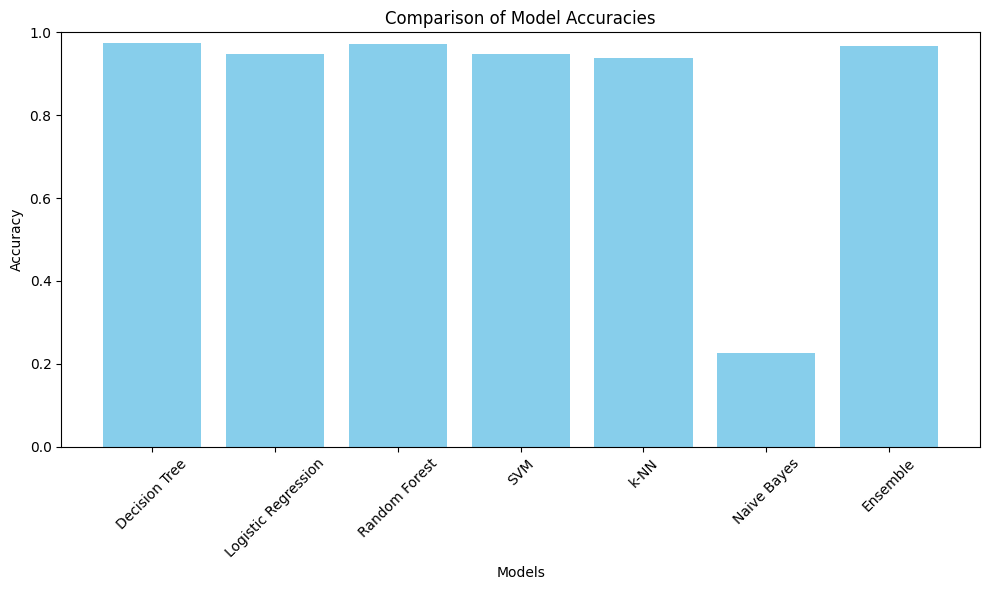

In [15]:
results = {}
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    if name == 'K-Means':
        clf.fit(X_train)
        y_pred = clf.predict(X_test)
        y_pred = [1 if x == 1 else 0 for x in y_pred]  
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")


print("\nStep 8: Visualizing accuracy comparison...")
models = list(results.keys())
accuracies = [results[model]['Accuracy'] for model in models]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

C:\Users\aurro\AppData\Local\Temp\ipykernel_3600\2162314725.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45)
C:\Users\aurro\AppData\Local\Temp\ipykernel_3600\2162314725.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45)
C:\Users\aurro\AppData\Local\Temp\ipykernel_3600\2162314725.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45)
C:\Users\aurro\AppData\Local\Temp\ipykernel_3600\2162314725.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=45)


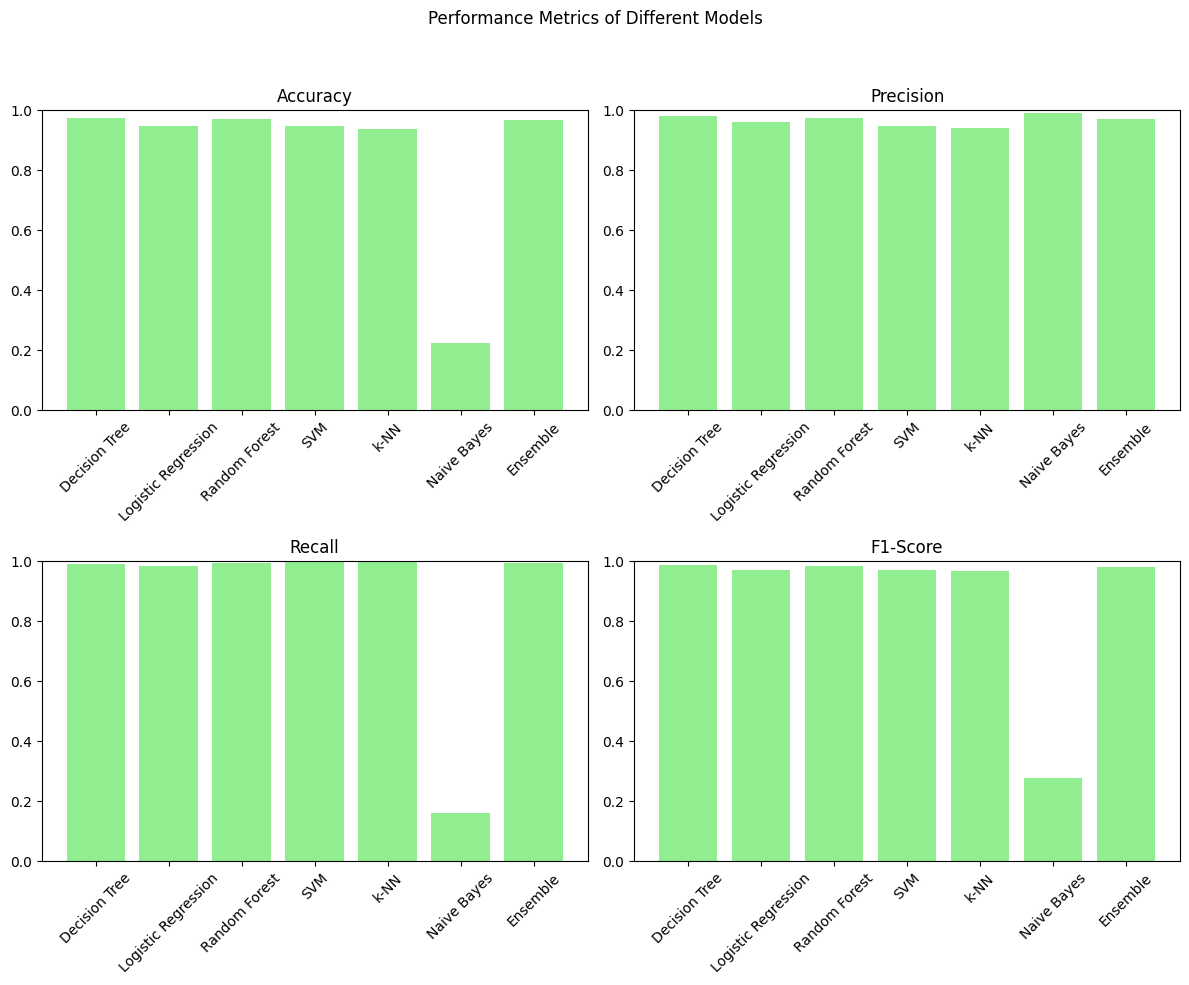

In [16]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Performance Metrics of Different Models')

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    values = [results[model][metric] for model in models]
    ax.bar(models, values, color='lightgreen')
    ax.set_title(metric)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(models, rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [17]:
base_paper_results = {
    'Decision Tree': {'Accuracy': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'F1-Score': 0.99},
    'Logistic Regression': {'Accuracy': 0.96, 'Precision': 0.97, 'Recall': 0.99, 'F1-Score': 0.98},
    'Random Forest': {'Accuracy': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'F1-Score': 0.99},
    'SVM': {'Accuracy': 0.87, 'Precision': 0.93, 'Recall': 0.95, 'F1-Score': 0.94},
    'k-NN': {'Accuracy': 0.95, 'Precision': 0.96, 'Recall': 0.99, 'F1-Score': 0.97},
    'Naive Bayes': {'Accuracy': 0.26, 'Precision': 0.98, 'Recall': 0.20, 'F1-Score': 0.33},
    'Ensemble': {'Accuracy': 0.974, 'Precision': None, 'Recall': None, 'F1-Score': None}
}

In [18]:
print("\nComparison Table: Script Results vs Base Paper")
print("-" * 80)
print(f"{'Model':<20} {'Metric':<15} {'Script':<10} {'Base Paper':<10} {'Difference':<10}")
print("-" * 80)
for model in results.keys():
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
        script_val = results[model][metric]
        base_val = base_paper_results.get(model, {}).get(metric, None)
        diff = script_val - base_val if base_val is not None else None
        
        base_val_str = f"{base_val:<10.2f}" if base_val is not None else f"{'N/A':<10}"
        diff_str = f"{diff:<10.2f}" if diff is not None else f"{'N/A':<10}"
        print(f"{model:<20} {metric:<15} {script_val:<10.2f} {base_val_str} {diff_str}")
print("-" * 80)


Comparison Table: Script Results vs Base Paper
--------------------------------------------------------------------------------
Model                Metric          Script     Base Paper Difference
--------------------------------------------------------------------------------
Decision Tree        Accuracy        0.97       0.99       -0.02     
Decision Tree        Precision       0.98       0.99       -0.01     
Decision Tree        Recall          0.99       0.99       0.00      
Decision Tree        F1-Score        0.99       0.99       -0.00     
Logistic Regression  Accuracy        0.95       0.96       -0.01     
Logistic Regression  Precision       0.96       0.97       -0.01     
Logistic Regression  Recall          0.98       0.99       -0.01     
Logistic Regression  F1-Score        0.97       0.98       -0.01     
Random Forest        Accuracy        0.97       0.99       -0.02     
Random Forest        Precision       0.97       0.99       -0.02     
Random Forest       

In [25]:
#AFTER BASE PAPER IMPLEMENTATION

In [26]:
#HYPER PARAMETER TUNING

In [19]:
from scipy.stats import uniform, randint
param_distributions = {
    'Decision Tree': {'max_depth': [None] + list(range(5, 21, 5)), 'min_samples_split': randint(2, 11)},
    'Logistic Regression': {'C': uniform(0.1, 10), 'solver': ['lbfgs', 'liblinear']},
    'Random Forest': {'n_estimators': randint(50, 201), 'max_depth': [None] + list(range(10, 31, 10))},
    'SVM': {'C': uniform(0.1, 10), 'kernel': ['linear', 'rbf']},
    'k-NN': {'n_neighbors': randint(3, 10), 'weights': ['uniform', 'distance']},
    'Naive Bayes': {}
}

In [20]:
param_grids = {
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'k-NN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Naive Bayes': {}
}

In [21]:
def plot_correlation_heatmap(X_data, title):
    X_df = pd.DataFrame(X_data, columns=[f'Feature_{i}' for i in range(X_data.shape[1])])
    correlation_matrix = X_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [26]:
def plot_correlation_heatmap(X_data, title):
    X_df = pd.DataFrame(X_data, columns=[f'Feature_{i}' for i in range(X_data.shape[1])])
    correlation_matrix = X_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

# --- Task 1: Basic Hyperparameter Tuning (GridSearchCV) ---
print("\n Task 1: Basic Hyperparameter Tuning (GridSearchCV)")
results_task1_grid = {}
for name, clf in classifiers.items():
    print(f"\nTuning {name} with GridSearchCV...")
    if param_grids[name]:
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print(f"Best parameters: {grid_search.best_params_}")
        clf = grid_search.best_estimator_
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results_task1_grid[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1-Score': f1_score(y_test, y_pred, average='binary')
    }
    print(f"{name} Results: Accuracy={results_task1_grid[name]['Accuracy']:.2f}")

ensemble_task1_grid = VotingClassifier(estimators=[(k, classifiers[k]) for k in classifiers], voting='hard')
ensemble_task1_grid.fit(X_train, y_train)
y_pred = ensemble_task1_grid.predict(X_test)
results_task1_grid['Ensemble'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='binary'),
    'Recall': recall_score(y_test, y_pred, average='binary'),
    'F1-Score': f1_score(y_test, y_pred, average='binary')
}
print(f"Ensemble Results: Accuracy={results_task1_grid['Ensemble']['Accuracy']:.2f}")





 Task 1: Basic Hyperparameter Tuning (GridSearchCV)

Tuning Decision Tree with GridSearchCV...
Best parameters: {'max_depth': 10, 'min_samples_split': 5}
Decision Tree Results: Accuracy=0.98

Tuning Logistic Regression with GridSearchCV...
Best parameters: {'C': 1, 'solver': 'lbfgs'}
Logistic Regression Results: Accuracy=0.95

Tuning Random Forest with GridSearchCV...
Best parameters: {'max_depth': 20, 'n_estimators': 100}
Random Forest Results: Accuracy=0.97

Tuning SVM with GridSearchCV...
Best parameters: {'C': 10, 'kernel': 'rbf'}
SVM Results: Accuracy=0.95

Tuning k-NN with GridSearchCV...
Best parameters: {'n_neighbors': 7, 'weights': 'distance'}
k-NN Results: Accuracy=0.94

Tuning Naive Bayes with GridSearchCV...
Naive Bayes Results: Accuracy=0.23
Ensemble Results: Accuracy=0.97


In [34]:
# Task 1: Basic Hyperparameter Tuning (RandomizedSearchCV)
print("\n Task 1: Basic Hyperparameter Tuning (RandomizedSearchCV) ")
results_task1_random = {}
for name, clf in classifiers.items():
    print(f"\nTuning {name} with RandomizedSearchCV...")
    if param_distributions[name]:
        random_search = RandomizedSearchCV(clf, param_distributions[name], n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        print(f"Best parameters: {random_search.best_params_}")
        clf = random_search.best_estimator_
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results_task1_random[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1-Score': f1_score(y_test, y_pred, average='binary')
    }
    print(f"{name} Results: Accuracy={results_task1_random[name]['Accuracy']:.2f}")

ensemble_task1_random = VotingClassifier(estimators=[(k, classifiers[k]) for k in classifiers], voting='hard')
ensemble_task1_random.fit(X_train, y_train)
y_pred = ensemble_task1_random.predict(X_test)
results_task1_random['Ensemble'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='binary'),
    'Recall': recall_score(y_test, y_pred, average='binary'),
    'F1-Score': f1_score(y_test, y_pred, average='binary')
}
print(f"Ensemble Results: Accuracy={results_task1_random['Ensemble']['Accuracy']:.2f}")


 Task 1: Basic Hyperparameter Tuning (RandomizedSearchCV) 

Tuning Decision Tree with RandomizedSearchCV...
Best parameters: {'max_depth': 10, 'min_samples_split': 7}
Decision Tree Results: Accuracy=0.98

Tuning Logistic Regression with RandomizedSearchCV...
Best parameters: {'C': 1.934347898661638, 'solver': 'liblinear'}
Logistic Regression Results: Accuracy=0.95

Tuning Random Forest with RandomizedSearchCV...
Best parameters: {'max_depth': 20, 'n_estimators': 142}
Random Forest Results: Accuracy=0.97

Tuning SVM with RandomizedSearchCV...
Best parameters: {'C': 8.424426408004217, 'kernel': 'rbf'}
SVM Results: Accuracy=0.95

Tuning k-NN with RandomizedSearchCV...
Best parameters: {'n_neighbors': 7, 'weights': 'distance'}
k-NN Results: Accuracy=0.94

Tuning Naive Bayes with RandomizedSearchCV...
Naive Bayes Results: Accuracy=0.23
Ensemble Results: Accuracy=0.97


In [ ]:
#correlation study after hyper parameter tuning


 Task 2: Correlation Analysis with Hyperparameter Tuning (GridSearchCV)


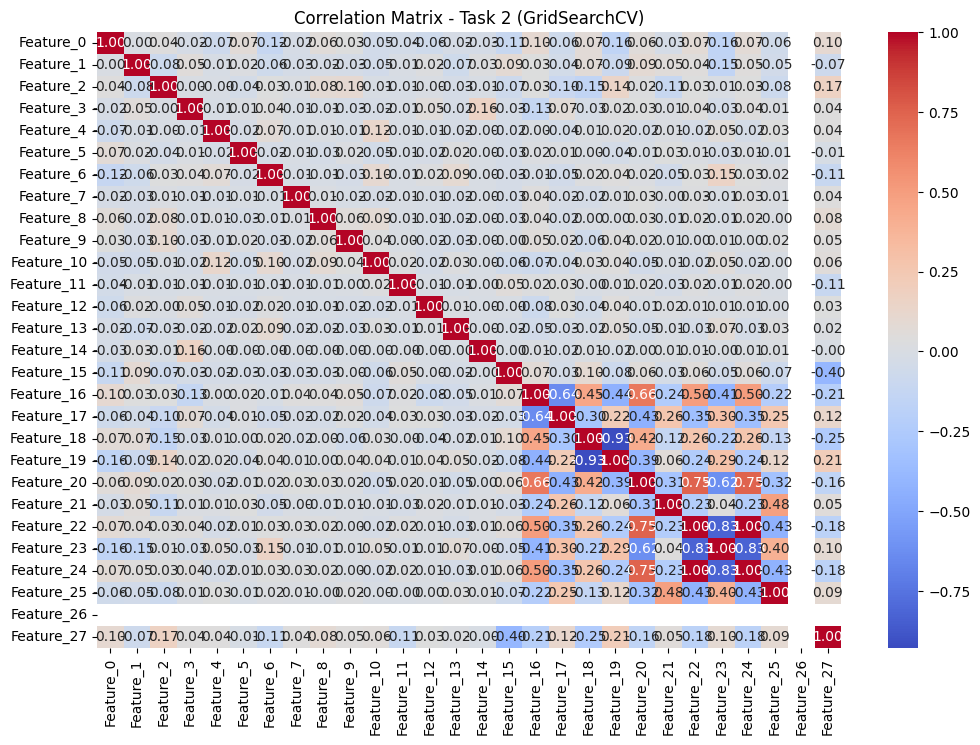

In [37]:
#  Task 2: Correlation Analysis with Hyperparameter Tuning (GridSearchCV) 
print("\n Task 2: Correlation Analysis with Hyperparameter Tuning (GridSearchCV)")
plot_correlation_heatmap(X_train, "Correlation Matrix - Task 2 (GridSearchCV)")



 Task 2: Correlation Analysis with Hyperparameter Tuning (RandomizedSearchCV) 


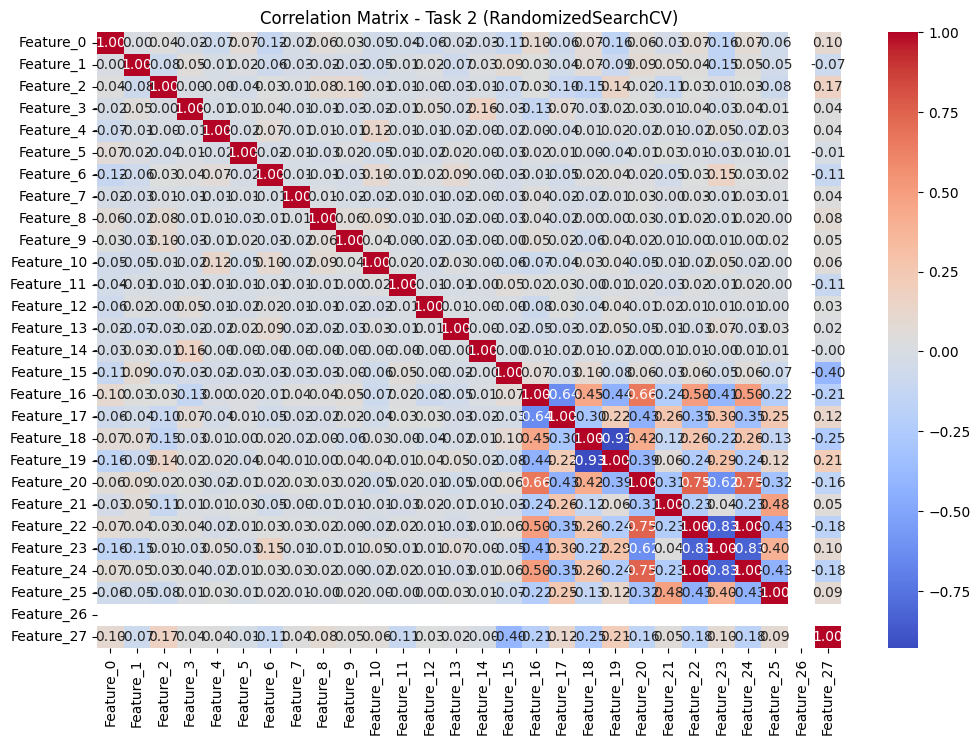

In [38]:
#  Task 2: Correlation Analysis with Hyperparameter Tuning (RandomizedSearchCV) 
print("\n Task 2: Correlation Analysis with Hyperparameter Tuning (RandomizedSearchCV) ")
plot_correlation_heatmap(X_train, "Correlation Matrix - Task 2 (RandomizedSearchCV)")

In [ ]:
#LDA

In [27]:
# Task 3: LDA Feature Reduction with Hyperparameter Tuning (GridSearchCV) 
print("\n Task 3: LDA Feature Reduction with Hyperparameter Tuning (GridSearchCV)")
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
print("LDA applied. New training set shape:", X_train_lda.shape)
results_task3_grid = {}
for name, clf in classifiers.items():
    print(f"\nTuning {name} with GridSearchCV...")
    if param_grids[name]:
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_lda, y_train)
        print(f"Best parameters: {grid_search.best_params_}")
        clf = grid_search.best_estimator_
    
    clf.fit(X_train_lda, y_train)
    y_pred = clf.predict(X_test_lda)
    results_task3_grid[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1-Score': f1_score(y_test, y_pred, average='binary')
    }
    print(f"{name} Results: Accuracy={results_task3_grid[name]['Accuracy']:.2f}")

ensemble_task3_grid = VotingClassifier(estimators=[(k, classifiers[k]) for k in classifiers], voting='hard')
ensemble_task3_grid.fit(X_train_lda, y_train)
y_pred = ensemble_task3_grid.predict(X_test_lda)
results_task3_grid['Ensemble'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='binary'),
    'Recall': recall_score(y_test, y_pred, average='binary'),
    'F1-Score': f1_score(y_test, y_pred, average='binary')
}
print(f"Ensemble Results: Accuracy={results_task3_grid['Ensemble']['Accuracy']:.2f}")



 Task 3: LDA Feature Reduction with Hyperparameter Tuning (GridSearchCV)
LDA applied. New training set shape: (3017, 1)

Tuning Decision Tree with GridSearchCV...
Best parameters: {'max_depth': 10, 'min_samples_split': 2}
Decision Tree Results: Accuracy=0.93

Tuning Logistic Regression with GridSearchCV...
Best parameters: {'C': 10, 'solver': 'lbfgs'}
Logistic Regression Results: Accuracy=0.94

Tuning Random Forest with GridSearchCV...
Best parameters: {'max_depth': 10, 'n_estimators': 50}
Random Forest Results: Accuracy=0.93

Tuning SVM with GridSearchCV...
Best parameters: {'C': 10, 'kernel': 'rbf'}
SVM Results: Accuracy=0.94

Tuning k-NN with GridSearchCV...
Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
k-NN Results: Accuracy=0.93

Tuning Naive Bayes with GridSearchCV...
Naive Bayes Results: Accuracy=0.94
Ensemble Results: Accuracy=0.94


In [28]:
# --- Task 3: LDA Feature Reduction with Hyperparameter Tuning (RandomizedSearchCV) ---
print("\n Task 3: LDA Feature Reduction with Hyperparameter Tuning (RandomizedSearchCV) ")
results_task3_random = {}
for name, clf in classifiers.items():
    print(f"\nTuning {name} with RandomizedSearchCV...")
    if param_distributions[name]:
        random_search = RandomizedSearchCV(clf, param_distributions[name], n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
        random_search.fit(X_train_lda, y_train)
        print(f"Best parameters: {random_search.best_params_}")
        clf = random_search.best_estimator_
    
    clf.fit(X_train_lda, y_train)
    y_pred = clf.predict(X_test_lda)
    results_task3_random[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1-Score': f1_score(y_test, y_pred, average='binary')
    }
    print(f"{name} Results: Accuracy={results_task3_random[name]['Accuracy']:.2f}")

ensemble_task3_random = VotingClassifier(estimators=[(k, classifiers[k]) for k in classifiers], voting='hard')
ensemble_task3_random.fit(X_train_lda, y_train)
y_pred = ensemble_task3_random.predict(X_test_lda)
results_task3_random['Ensemble'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='binary'),
    'Recall': recall_score(y_test, y_pred, average='binary'),
    'F1-Score': f1_score(y_test, y_pred, average='binary')
}
print(f"Ensemble Results: Accuracy={results_task3_random['Ensemble']['Accuracy']:.2f}")


 Task 3: LDA Feature Reduction with Hyperparameter Tuning (RandomizedSearchCV) 

Tuning Decision Tree with RandomizedSearchCV...
Best parameters: {'max_depth': 5, 'min_samples_split': 4}
Decision Tree Results: Accuracy=0.94

Tuning Logistic Regression with RandomizedSearchCV...
Best parameters: {'C': 3.845401188473625, 'solver': 'lbfgs'}
Logistic Regression Results: Accuracy=0.94

Tuning Random Forest with RandomizedSearchCV...
Best parameters: {'max_depth': 10, 'n_estimators': 102}
Random Forest Results: Accuracy=0.93

Tuning SVM with RandomizedSearchCV...
Best parameters: {'C': 8.424426408004217, 'kernel': 'rbf'}
SVM Results: Accuracy=0.94

Tuning k-NN with RandomizedSearchCV...
Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
k-NN Results: Accuracy=0.93

Tuning Naive Bayes with RandomizedSearchCV...
Naive Bayes Results: Accuracy=0.94
Ensemble Results: Accuracy=0.94



Visualizing Task 1: Basic Hyperparameter Tuning (GridSearchCV)...


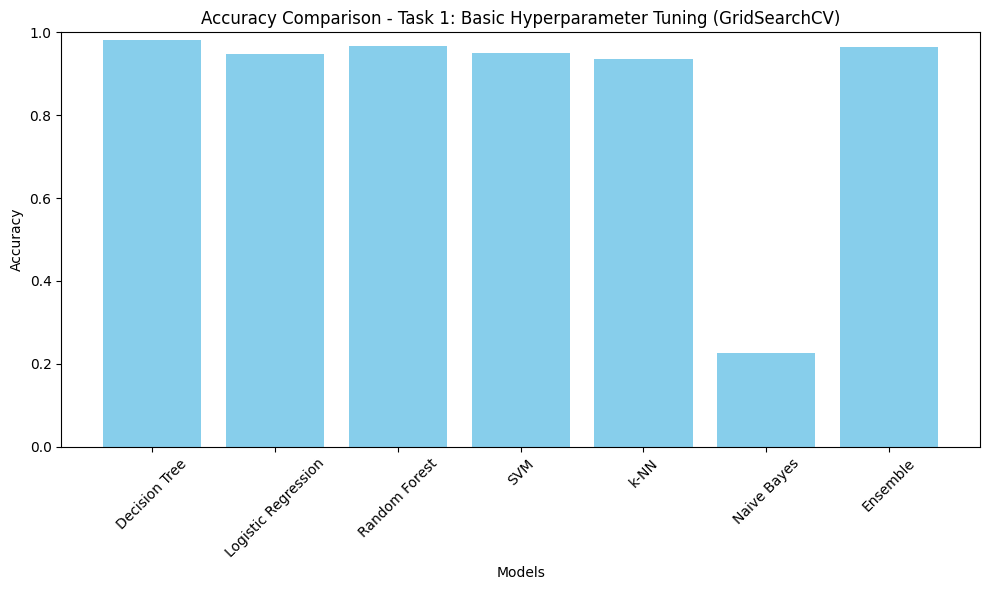


Visualizing Task 1: Basic Hyperparameter Tuning (RandomizedSearchCV)...


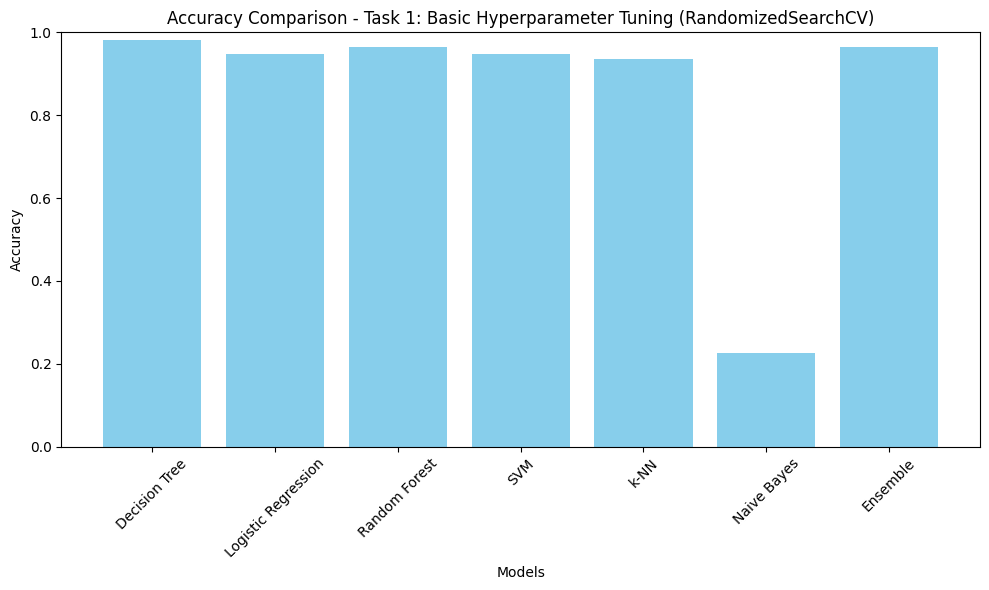


Visualizing Task 2: Correlation Analysis with Hyperparameter Tuning (GridSearchCV)...


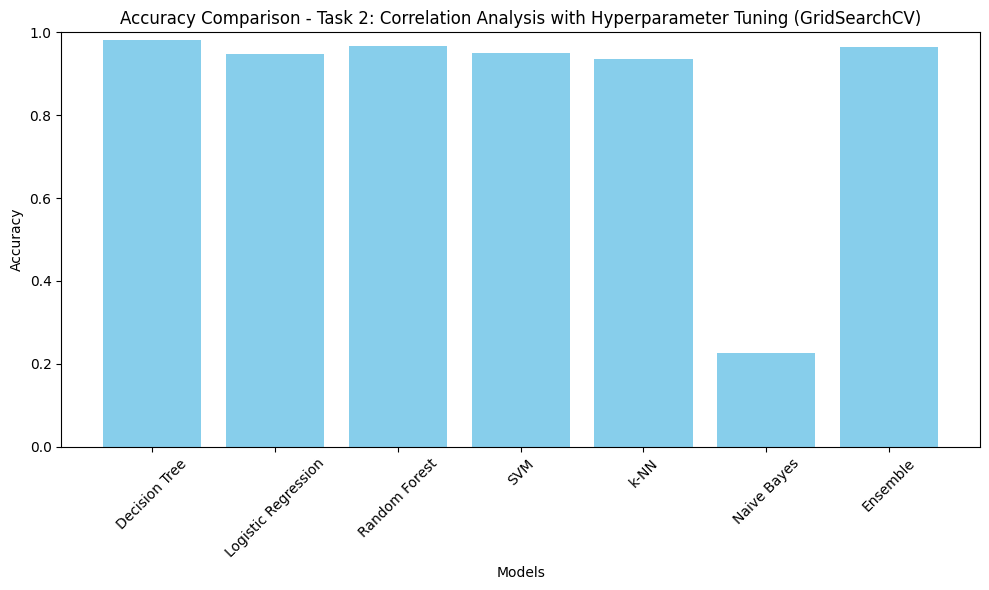


Visualizing Task 2: Correlation Analysis with Hyperparameter Tuning (RandomizedSearchCV)...


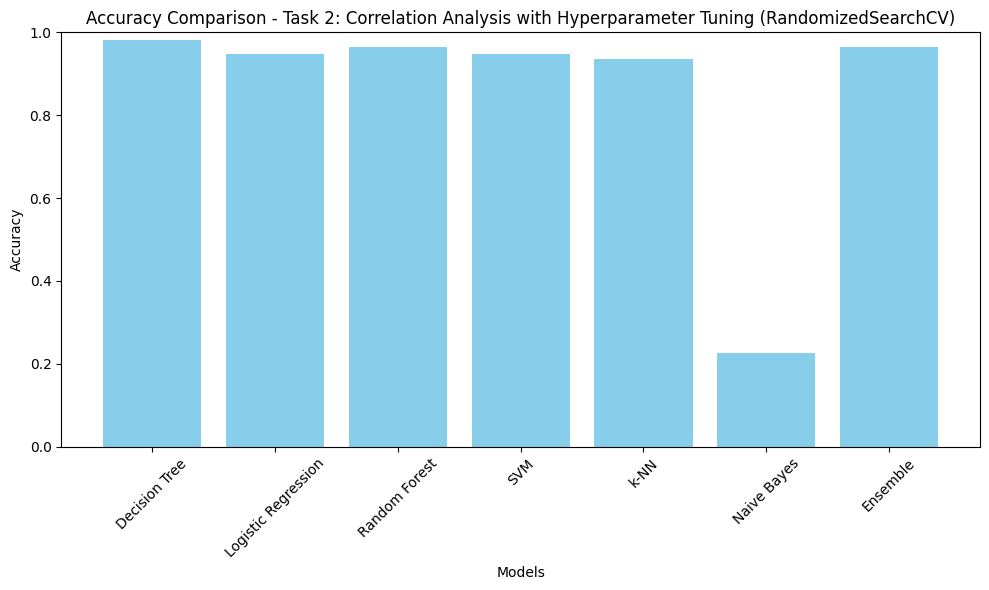


Visualizing Task 3: LDA Feature Reduction with Hyperparameter Tuning (GridSearchCV)...


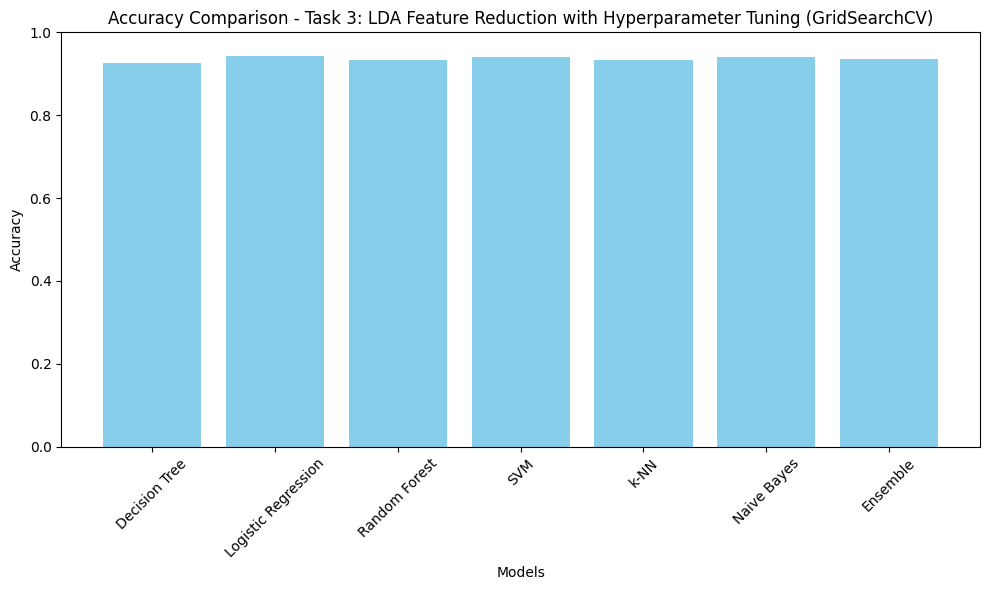


Visualizing Task 3: LDA Feature Reduction with Hyperparameter Tuning (RandomizedSearchCV)...


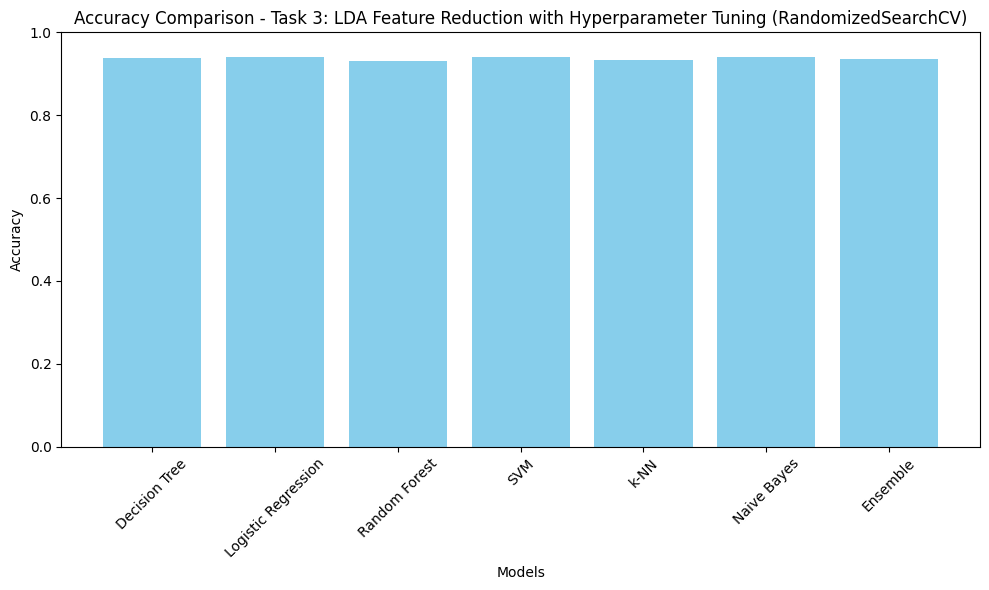

In [29]:
# Visualisation
for task_name, results in [
    ('Task 1: Basic Hyperparameter Tuning (GridSearchCV)', results_task1_grid),
    ('Task 1: Basic Hyperparameter Tuning (RandomizedSearchCV)', results_task1_random),
    ('Task 2: Correlation Analysis with Hyperparameter Tuning (GridSearchCV)', results_task2_grid),
    ('Task 2: Correlation Analysis with Hyperparameter Tuning (RandomizedSearchCV)', results_task2_random),
    ('Task 3: LDA Feature Reduction with Hyperparameter Tuning (GridSearchCV)', results_task3_grid),
    ('Task 3: LDA Feature Reduction with Hyperparameter Tuning (RandomizedSearchCV)', results_task3_random)
]:
    print(f"\nVisualizing {task_name}...")
    models = list(results.keys())
    accuracies = [results[model]['Accuracy'] for model in models]
    
    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies, color='skyblue')
    plt.title(f'Accuracy Comparison - {task_name}')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()



In [31]:
base_paper_results = {
    'Decision Tree': {'Accuracy': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'F1-Score': 0.99},
    'Logistic Regression': {'Accuracy': 0.96, 'Precision': 0.97, 'Recall': 0.99, 'F1-Score': 0.98},
    'Random Forest': {'Accuracy': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'F1-Score': 0.99},
    'SVM': {'Accuracy': 0.87, 'Precision': 0.93, 'Recall': 0.95, 'F1-Score': 0.94},
    'k-NN': {'Accuracy': 0.95, 'Precision': 0.96, 'Recall': 0.99, 'F1-Score': 0.97},
    'Naive Bayes': {'Accuracy': 0.26, 'Precision': 0.98, 'Recall': 0.20, 'F1-Score': 0.33},
    'Ensemble': {'Accuracy': 0.974, 'Precision': None, 'Recall': None, 'F1-Score': None}
}



In [32]:
for task_name, results in [
    ('Task 1: Basic Hyperparameter Tuning (GridSearchCV)', results_task1_grid),
    ('Task 1: Basic Hyperparameter Tuning (RandomizedSearchCV)', results_task1_random),
    ('Task 2: Correlation Analysis with Hyperparameter Tuning (GridSearchCV)', results_task2_grid),
    ('Task 2: Correlation Analysis with Hyperparameter Tuning (RandomizedSearchCV)', results_task2_random),
    ('Task 3: LDA Feature Reduction with Hyperparameter Tuning (GridSearchCV)', results_task3_grid),
    ('Task 3: LDA Feature Reduction with Hyperparameter Tuning (RandomizedSearchCV)', results_task3_random)
]:
    print(f"\nComparison Table: {task_name} vs Base Paper")
    print("-" * 80)
    print(f"{'Model':<20} {'Metric':<15} {'Script':<10} {'Base Paper':<10} {'Difference':<10}")
    print("-" * 80)
    for model in results.keys():
        for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
            script_val = results[model][metric]
            base_val = base_paper_results.get(model, {}).get(metric, None)
            diff = script_val - base_val if base_val is not None else None
            base_val_str = f"{base_val:<10.2f}" if base_val is not None else f"{'N/A':<10}"
            diff_str = f"{diff:<10.2f}" if diff is not None else f"{'N/A':<10}"
            print(f"{model:<20} {metric:<15} {script_val:<10.2f} {base_val_str} {diff_str}")
    print("-" * 80)


Comparison Table: Task 1: Basic Hyperparameter Tuning (GridSearchCV) vs Base Paper
--------------------------------------------------------------------------------
Model                Metric          Script     Base Paper Difference
--------------------------------------------------------------------------------
Decision Tree        Accuracy        0.98       0.99       -0.01     
Decision Tree        Precision       0.99       0.99       -0.00     
Decision Tree        Recall          0.99       0.99       0.00      
Decision Tree        F1-Score        0.99       0.99       -0.00     
Logistic Regression  Accuracy        0.95       0.96       -0.01     
Logistic Regression  Precision       0.96       0.97       -0.01     
Logistic Regression  Recall          0.99       0.99       -0.00     
Logistic Regression  F1-Score        0.97       0.98       -0.01     
Random Forest        Accuracy        0.97       0.99       -0.02     
Random Forest        Precision       0.97       0.99  